# Pattern Recognition - ViBOT MsCV

Guillaume Lemaitre - Fabrice Meriaudeau - Johan Massich

# Clustering

In [111]:

%matplotlib inline
%pprint off

# Matplotlib library
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

# MPLD3 extension
import mpld3

# Numpy library
import numpy as np

# Import the Scipy library for griddata
from scipy.interpolate import griddata


Pretty printing has been turned OFF


Import the library to perform the clustering with k-means and fuzzy c-means.

In [112]:

# Import k-means clustering method from scikit-learn
from sklearn.cluster import KMeans
# Import fuzzy c-means from scikit-fuzzy
import skfuzzy as fuzz


Assuming the following generated points:

* Two classes with respective labels 0 and 1,
* Class #1 follows with labels 0 a multivariate normal distribution with:

$$\mu_1 = \left[ 1, 1 \right]$$

$$\Sigma_1 = \left[ \begin{matrix} 1 && 0 \\ 0 && 1 \end{matrix} \right]$$

* Class #2 with labels 1 follows a multivariate normal distribution with:

$$\mu_2 = \left[ -1, -1 \right]$$

$$\Sigma_2 = \left[ \begin{matrix} 1 && 0 \\ 0 && 1 \end{matrix} \right]$$

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

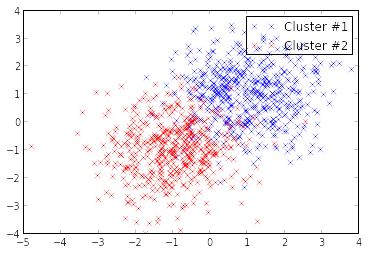

(1000, 2)

In [185]:

# Size of points in the dataset
N = 1000

# Define the property of the gaussian distribution
mean1, mean2 = np.array([1., 1.]), np.array([-1., -1.])
cov1, cov2 = np.diagflat([1, 1]), np.diagflat([1, 1])

class_1 = np.random.multivariate_normal(mean1, cov1, N / 2)
class_2 = np.random.multivariate_normal(mean2, cov2, N / 2)

data = np.concatenate((class_1, class_2), axis=0)
gt = np.squeeze(np.concatenate((np.zeros((1, N / 2), dtype = int), np.ones((1, N / 2), dtype = int)), axis = 1))
print gt
fig = plt.figure()
# Find the indexes of the first cluster
plt.plot(class_1[:, 0], class_1[:, 1], 'xb', label='Cluster #1')
plt.plot(class_2[:, 0], class_2[:, 1], 'xr', label='Cluster #2')
plt.legend()
# Show the figure
plt.show()
data.shape

### Clustering via k-means

(a) Use k-means clustering method to find the cluster centers for $k=2$. To do so, you will:

* Call the constructor KMeans(),
* Use the function predict of the object build in order to apply the clustering,
* Get the centers of each cluster,
* Display these centers.

In [114]:
 
# Define the number of clusters k
k = 2

# Define the parameters of k-means
### use init 'random' and only one try
k_means_cluster = KMeans(k, init = 'random', n_init = 1)
# Run k-means
k_means_cluster.fit(data)
### Use the function predict()
k_means_cluster.predict(data)
# Get the centers of k-means
centers_k_means = k_means_cluster.cluster_centers_

print 'The centers found by k-means are \n {}'.format(centers_k_means)
centers_k_means.shape

The centers found by k-means are 
 [[-0.97000424 -1.03262264]
 [ 1.07169655  1.16317604]]


(2, 2)

(b) Plot the cluster centers and the data labelled by the k-means fitting.

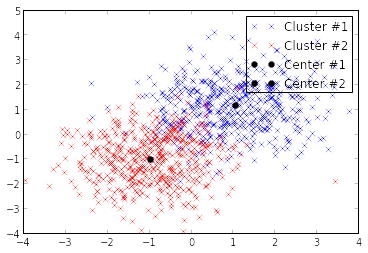

In [115]:
fig = plt.figure()
# Find the indexes of the first cluster
plt.plot(class_1[:, 0], class_1[:, 1], 'xb', label='Cluster #1')
plt.plot(class_2[:, 0], class_2[:, 1], 'xr', label='Cluster #2')

plt.plot(centers_k_means[0, 0], centers_k_means[0, 1], 'ok', label='Center #1')
plt.plot(centers_k_means[1, 0], centers_k_means[1, 1], 'ok', label='Center #2')
plt.legend()
# Show the figure
plt.show()



(c) Complete the following function to compute the misclassification rate.

In [116]:

# Compute the misclassification rate
def compute_error_rate(k_means_labels, gt_labels):
    ### Use the function nonzero()
    return float(np.size(np.nonzero(np.squeeze(k_means_labels != gt_labels)))) / float(np.size(gt_labels)) * 100.


(d) What is the misclassification for the current fitting? Highlight inside a plot the element which have been misclasified. 

**Hint**: think at swapping the label if the error rate is really high. The label affected is performed in an unsupervised manner.

The error rate is 91.5 %
[[ 2.33115297  2.9283799 ]
 [ 1.5026844   0.21168458]
 [ 3.03076756  0.66597763]
 ..., 
 [ 0.3096249  -0.6845992 ]
 [-0.33361438  0.28643288]
 [-0.10465442 -0.83840679]]
[ 17  27  33  39  42  44  48  58  66  75  78  92  93 107 122 124 125 138
 162 169 192 206 225 232 243 250 253 258 285 286 289 295 313 328 343 353
 357 368 372 402 419 421 428 436 443 460 467 474 482 486 495 506 513 542
 551 557 567 572 581 585 599 600 611 617 647 654 663 675 678 696 701 718
 726 727 738 754 789 800 801 841 866 949 950 968 970]


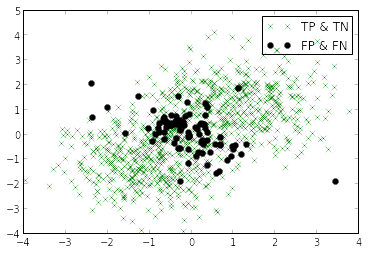

In [156]:

# Show the misclassification rate
print 'The error rate is {} %'.format(compute_error_rate(k_means_cluster.labels_, gt)) 

# Plot the misclassified samples
# Find the samples
idx_wellclass = np.ravel(np.nonzero(np.squeeze(k_means_cluster.labels_ == gt)))
idx_misclass = np.ravel(np.nonzero(np.squeeze(k_means_cluster.labels_ != gt)))


# Maybe we have to swap the cluster
if (np.size(idx_misclass) > np.size(idx_wellclass)):
    tmp = idx_wellclass[:]
    idx_wellclass = idx_misclass[:]
    idx_misclass = tmp[:]
    del tmp
    
# Get the data
data_wellclass = data[idx_wellclass,:]
data_misclass = data[idx_misclass,:]

# Make the plot
fig = plt.figure()
# Find the indexes of the first cluster

legend_tptn = plt.plot(data_wellclass[:,0], data_wellclass[:,1], 'xg');
legend_fpfn = plt.plot(data_misclass[:,0], data_misclass[:,1], 'ok');
plt.legend([legend_tptn[0], legend_fpfn[0]], ["TP & TN", "FP & FN"])
# Show the figure
plt.show()


(e) Repeat 10 times the k-means fitting and compute the mean error.

In [172]:

# Define the number of repetitions
rep_t = 10

# Accumulate the error
acc_err = 0.
for rep in range(0, 10):
    # Run k-means predict()
    k_means_cluster.predict(data)
    # Check the error and accumulate
    err = compute_error_rate(k_means_cluster.labels_, gt);
    acc_err += np.minimum(err, abs(100 - err))
    print 'The error rate is {} %'.format(acc_err/(rep+1) )
    
# Average the error
acc_err 

# Show the mean misclassification rate
print 'The mean error rate is {} %'.format(acc_err/rep_t)


The error rate is 8.5 %
The error rate is 8.5 %
The error rate is 8.5 %
The error rate is 8.5 %
The error rate is 8.5 %
The error rate is 8.5 %
The error rate is 8.5 %
The error rate is 8.5 %
The error rate is 8.5 %
The error rate is 8.5 %
The mean error rate is 8.5 %


### Clustering via fuzzy c-means

(a) Use fuzzy c-means clustering method to find the cluster centers for $c=2$. Check the following link for an example:
https://github.com/scikit-fuzzy/scikit-fuzzy/blob/master/skfuzzy/cluster/tests/test_cmeans.py

In [222]:
import skfuzzy as fuzz
# Define the number of clusters
c = 2
# Exponentiation parameter
m = 2.

# Run the fuzzy c-means - need to transpose the data
cntr, U, U0, d, Jm,, fpc = fuzz.cluster.cmeans(
data.T, c, m, error=0.005, maxiter=1000, init=None)

print U0
print U


[[ 0.54472324  0.44002666  0.68595247 ...,  0.4324111   0.66591587
   0.23941286]
 [ 0.45527676  0.55997334  0.31404753 ...,  0.5675889   0.33408413
   0.76058714]]
[[ 0.92956201  0.9517824   0.69295867 ...,  0.10027559  0.01511337
   0.05833479]
 [ 0.07043799  0.0482176   0.30704133 ...,  0.89972441  0.98488663
   0.94166521]]


(b) Plot the cluster centers and the membership degree of the data to each one of the two clusters.

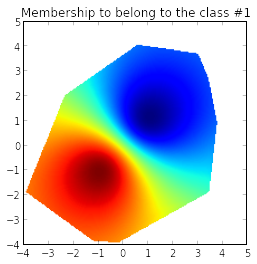

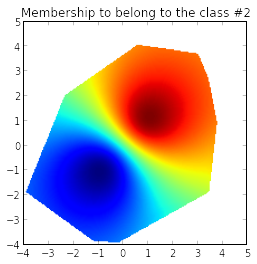

In [178]:

# Plot a representation depending of the membership
### Create a mesh grid using np.grid()
grid_x, grid_y = np.mgrid[-4.:5.:200j, -4.:5.:200j]
### Use the function griddata() in order to create the surface based on the membership degree 
grid_z0 = griddata(data, U[0], (grid_x, grid_y), method = 'cubic')
grid_z1 = griddata(data, U[1], (grid_x, grid_y), method = 'cubic')
fig = plt.figure()
plt.imshow(grid_z0.T, extent=(-4,5,-4,5), origin='lower')
plt.title('Membership to belong to the class #1')
plt.figure()
plt.imshow(grid_z1.T, extent=(-4,5,-4,5), origin='lower')
plt.title('Membership to belong to the class #2')
plt.show()


(c) Plot in each data point to the most probable cluster to which it will belongs. Plot also the centroids.

(503, 2)


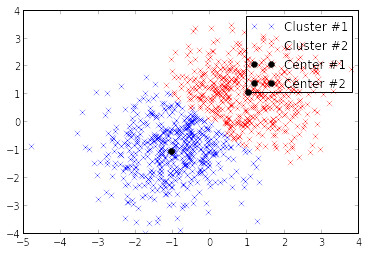

In [233]:
fig = plt.figure()
# Find the indexes of the first cluster
mem =  np.minimum(U[0],U[1])
Ut =U.T

label = Ut[:,1]>0.5
data_cls1 = data[label[:]==1,:]
data_cls2 = data[label[:]!=1,:]
print data_cls1.shape

plt.plot(data_cls1[:, 0], data_cls1[:, 1], 'xb', label='Cluster #1')
plt.plot(data_cls2[:, 0], data_cls2[:, 1], 'xr', label='Cluster #2')

plt.plot(cntr[0, 0], cntr[0, 1], 'ok', label='Center #1')
plt.plot(cntr[1, 0], cntr[1, 1], 'ok', label='Center #2')
plt.legend()
# Show the figure
plt.show()


(d) Compute the misclassifcation error rate.

In [234]:
print 'The error rate is {} %'.format(compute_error_rate(label, gt)) 

The error rate is 7.1 %


## Retina segmentation using k-means and fuzzy c-means

In [ ]:

# Import scikit-image for input-output manipulation
from skimage import io
from skimage import img_as_float


Assuming that the image can be clustered with four classes:

* One cluster with artefacts at the edges of the image
* One cluster with the optic nerve and other artefacts
* One cluster with noise across the image
* One cluster with the vessels

In [405]:

# Number of classes
nb_classes = 4


(a) From the `data` folder, load the retina image `retina.jpg`. Convert it into float type.

0.0235294117647


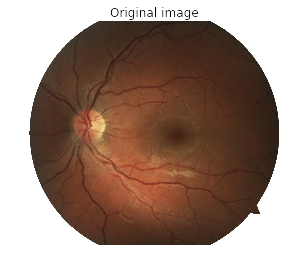

(913, 1024, 3)

In [279]:

# Load the images
# Use the function img_as_float()
# Use the function io.imread()

retina_im = img_as_float(io.imread('/home/masters/B31XI-SI-Clustering/data/retina.jpg'))
print np.min(retina_im[:,:])
# Show the results
fig, ax = plt.subplots()
ax.imshow(retina_im)
ax.set_title('Original image')
ax.axis('off')

plt.show()
retina_im.shape

(b) Complete the following Python function. 

* Compute a background image using a median filtering for each colour channel with a square kernel of size 30. 
* Subtract each background channel to the original channel. 
* Normalise each channel using min-max normalisation.

In [281]:

# Import morpho element
from skimage.morphology import square
# Import the median filtering
from skimage.filter.rank import median

# Function to pre process the images
def PreProcessing(rgb_image):
    output = np.zeros(np.shape(rgb_image))
    
    # Obtain the background image for each channel through median filtering
    background_im_r = img_as_float(median(rgb_image[:,:,0], square(30)))
    background_im_g = img_as_float(median(rgb_image[:,:,1], square(30)))
    background_im_b = img_as_float(median(rgb_image[:,:,2], square(30)))    
    # Remove the background from the original image
    output[:, :, 0] = rgb_image[:,:,0] - background_im_r
    output[:, :, 1] = rgb_image[:,:,1] - background_im_g
    output[:, :, 2] = rgb_image[:,:,2] - background_im_b

    # Normalise the image
    output[:, :, 0] = normalise_im(output[:, :, 0])
    output[:, :, 1] = normalise_im(output[:, :, 1])
    output[:, :, 2] = normalise_im(output[:, :, 2])
    
    return output

# Function to apply min-max normalisation
def normalise_im(im_2d):
    return img_as_float(im_2d[:,:] - np.min(im_2d[:,:]))/(np.max(im_2d[:,:]) - np.min(im_2d[:,:]))


(c) Apply the pre-processing to retina image and plot the resulting image.

(913, 1024, 3)


(-0.5, 1023.5, 912.5, -0.5)

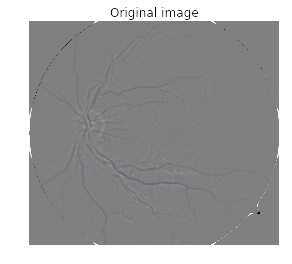

In [284]:
print np.shape(retina_im)
fig, ax = plt.subplots()

opIm = PreProcessing(retina_im[:,:])
ax.imshow(opIm)
ax.set_title('Original image')
ax.axis('off')


(d) Extract the characteristic features from the pre-processed image.

In [352]:

# Extraction of the data
### You can use np.reshape()
data = opIm.reshape(opIm.shape[0]*opIm.shape[1], 3)
print opIm.shape

(913, 1024, 3)


(e) Run k-means with 10 iterations and `k-means++` as initialisation of the cluster.

In [406]:
k_means_cluster = KMeans(nb_classes,init = 'k-means++', n_init = 10)
# Run k-means
k_means_cluster.fit(data)
### Use the function predict()
k_means_cluster.predict(data)
# Get the centers of k-means
centers_k_means = k_means_cluster.cluster_centers_
print centers_k_means

[[ 0.50239105  0.50338086  0.50835618]
 [ 0.94883706  0.95641771  0.95343519]
 [ 0.08995318  0.09646685  0.11325883]
 [ 0.47312004  0.47216009  0.48917229]]


(f) Plot each cluster to observe the segmentation.

(934912,)
(934912,)


(-0.5, 1023.5, 912.5, -0.5)

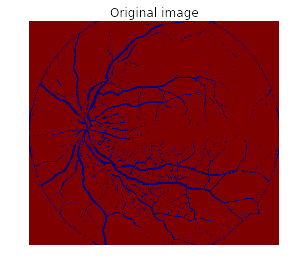

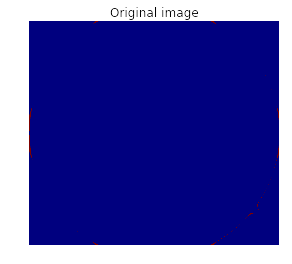

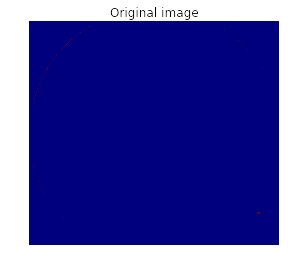

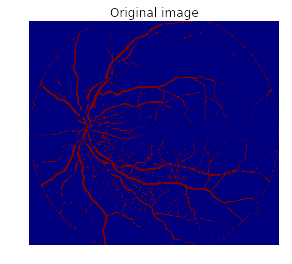

In [408]:
labelCh = k_means_cluster.labels_
im0 = labelCh[:]==0
im1 = labelCh[:]==1
im2 = labelCh[:]==2
im3 = labelCh[:]==3
print im1.shape

t0 = im0.reshape(opIm.shape[0], opIm.shape[1])
t1 = im1.reshape(opIm.shape[0], opIm.shape[1])
t2 = im2.reshape(opIm.shape[0], opIm.shape[1])
t3 = im3.reshape(opIm.shape[0], opIm.shape[1])
print t.shape
fig, ax = plt.subplots()
ax.imshow(t0)
ax.set_title('Original image')
ax.axis('off')

fig, ax = plt.subplots()
ax.imshow(t1)
ax.set_title('Original image')
ax.axis('off')
fig, ax = plt.subplots()
ax.imshow(t2)
ax.set_title('Original image')
ax.axis('off')
fig, ax = plt.subplots()
ax.imshow(t3)
ax.set_title('Original image')
ax.axis('off')



(g) Run fuzzy c-means.

In [409]:
# Run the fuzzy c-means - need to transpose the data
cntr, U, U0, d, Jm, p, fpc = fuzz.cluster.cmeans(
data.T, nb_classes, 2, error=0.005, maxiter=1000, init=None)

(h) Plot the degree of membership for each cluster to depict the segmentation.

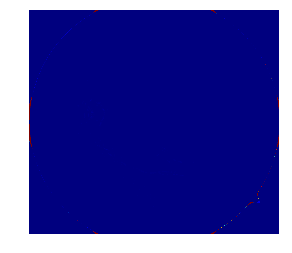

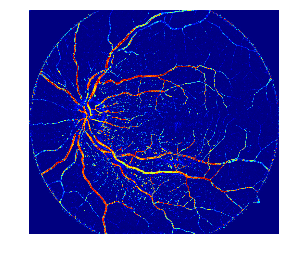

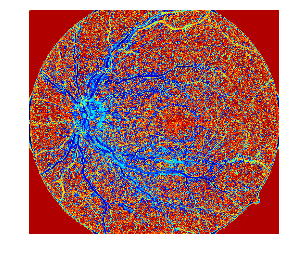

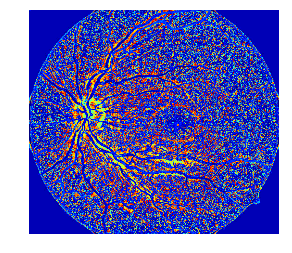

In [413]:


# Plot the degree of membership for each cluster
for p in range(0, nb_classes):
    fig, ax = plt.subplots()
    ax.imshow(np.reshape(U[p, :], (np.shape(retina_im)[0], np.shape(retina_im)[1])))
    ax.axis('off')

    plt.show()
    










